In [13]:
import pandas as pd

# Load dataset
df = pd.read_excel('Superstore_Sales_Dataset (1).xlsx')

# Check nulls and dtypes
df.info
df.isnull().sum()
# convert date columns 
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
# Drop Duplicate
df.drop_duplicates(inplace=True)
df.head(10)

,Order ID,Order Date,Ship Date,Customer Name,Customer Segment,Category,Sub-Category,Product Name,Sales Amount,Profit,Discount,Quantity,Region,State
0,ORD1000,2023-03-28,2023-03-30,Customer 86,Home Office,Office Supplies,Binders,Binders 96,611.31,39.71,0.16,8,South,Texas
1,ORD1001,2023-10-15,2023-10-17,Customer 449,Home Office,Technology,Phones,Phones 54,62.75,5.02,0.11,4,East,California
2,ORD1002,2023-01-24,2023-01-30,Customer 90,Corporate,Technology,Printers,Printers 47,454.63,52.64,0.18,3,West,Texas
3,ORD1003,2023-04-04,2023-04-09,Customer 383,Home Office,Technology,Printers,Printers 92,404.49,108.25,0.06,9,South,California
4,ORD1004,2023-06-11,2023-06-15,Customer 84,Small Business,Office Supplies,Paper,Paper 43,295.64,50.94,0.05,10,West,Florida
5,ORD1005,2023-07-02,2023-07-06,Customer 422,Consumer,Technology,Laptops,Laptops 30,245.85,41.97,0.13,9,South,California
6,ORD1006,2023-08-31,2023-09-07,Customer 326,Home Office,Office Supplies,Pens,Pens 45,332.45,37.59,0.08,2,West,New York
7,ORD1007,2023-05-29,2023-06-05,Customer 473,Small Business,Technology,Laptops,Laptops 19,642.65,172.08,0.01,9,Central,Illinois
8,ORD1008,2023-08-21,2023-08-23,Customer 485,Corporate,Office Supplies,Pens,Pens 59,631.86,106.10,0.05,3,East,Illinois
9,ORD1009,2023-03-22,2023-03-24,Customer 145,Corporate,Office Supplies,Binders,Binders 27,253.37,51.71,0.16,10,Central,Texas


In [16]:
# Time features from Order Date
df['Day']=df['Order Date'].dt.day
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['week']=df['Order Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])  # Saturday = 5, Sunday = 6

In [22]:
# Daily sales (total across all orders for a day)
daily_sales = df.groupby('Order Date')['Sales Amount'].sum().reset_index(name='Daily_Sales')
# Merge into main df
df = pd.merge(df, daily_sales, on='Order Date', how='left')

In [23]:
# Lag and rolling features for forecasting
df['Sales_Lag_1'] = df['Daily_Sales'].shift(1)
df['Sales_Lag_7'] = df['Daily_Sales'].shift(7)
df['Rolling_Mean_7'] = df['Daily_Sales'].rolling(window=7).mean()

In [25]:
# Average sales per region (can show different performance
region_avg = df.groupby('Region')['Sales Amount'].mean().reset_index(name='Region_Avg_Sales')
df = pd.merge(df, region_avg, on='Region', how='left')


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='year-month'>

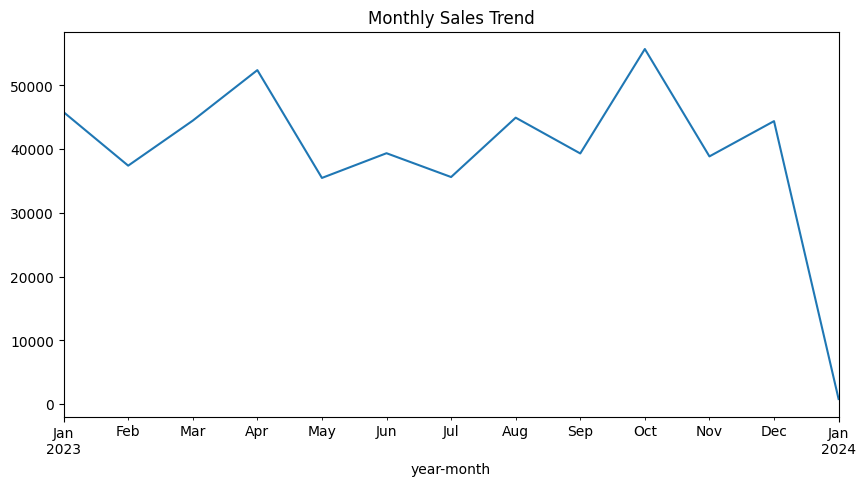

In [31]:
# Monthly Sales Trend
monthly_sales = df.groupby(['year', 'month'])['Sales Amount'].sum().reset_index()

# Plot using pandas
monthly_sales['year-month'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(DAY=1))
monthly_sales.set_index('year-month')['Sales Amount'].plot(title='Monthly Sales Trend', figsize=(10,5))


<Axes: title={'center': 'Sales by Sub-Category'}, ylabel='Sub-Category'>

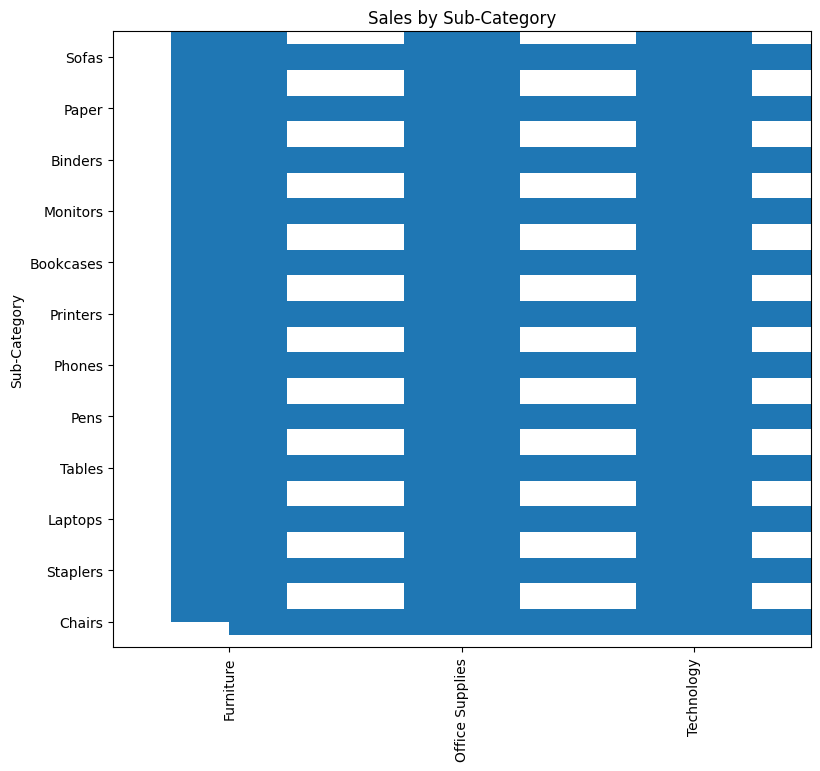

In [35]:
# Total sales by Category
df.groupby('Category')['Sales Amount'].sum().plot(kind='bar', title='Sales by Category', figsize=(8,4))

# Total sales by Sub-Category
df.groupby('Sub-Category')['Sales Amount'].sum().sort_values().plot(kind='barh', title='Sales by Sub-Category', figsize=(9,8))


<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

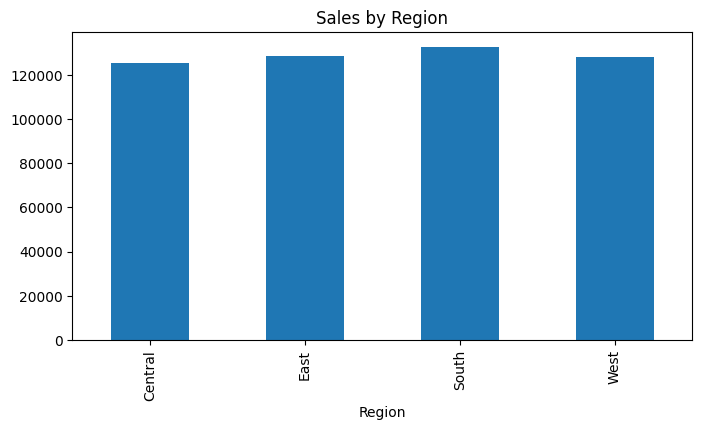

In [36]:
#Sales by Region
df.groupby('Region')['Sales Amount'].sum().plot(kind='bar', title='Sales by Region', figsize=(8,4))


Text(0.5, 1.0, 'Discount vs Profit')

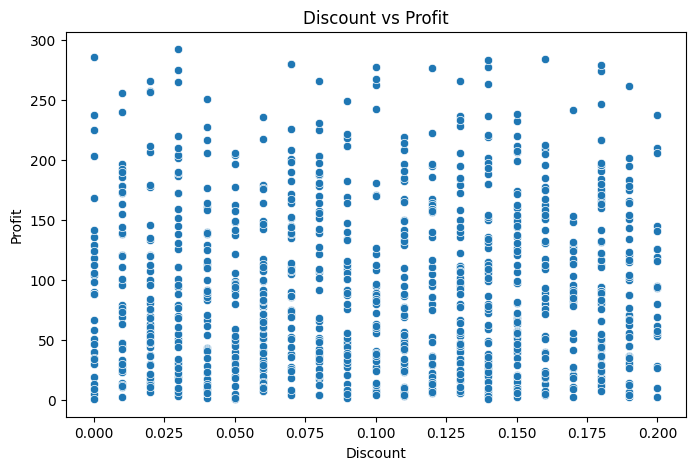

In [37]:
#Discount vs Profit Relationship
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')


Product Name
Sofas 64       3265.47
Binders 42     3166.44
Pens 57        3057.14
Paper 20       2973.28
Chairs 59      2835.83
Sofas 63       2825.07
Binders 89     2815.51
Laptops 19     2628.39
Monitors 94    2540.85
Paper 95       2467.31
Name: Sales Amount, dtype: float64

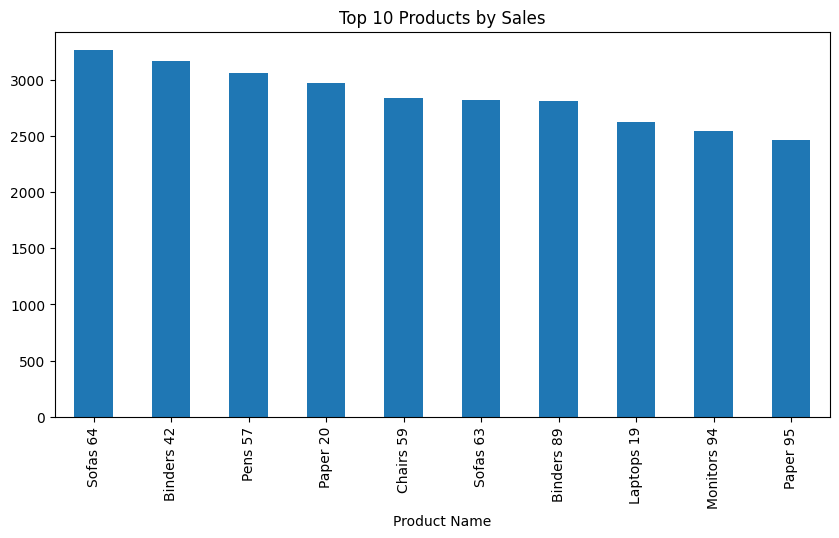

In [44]:
#Top Products by Sales
top_products = df.groupby('Product Name')['Sales Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales', figsize=(10,5))
top_products

In [45]:
# Daily total sales (already created earlier)
daily_sales = df.groupby('Order Date')['Sales Amount'].sum().reset_index()
daily_sales.columns = ['Date', 'Sales']


In [68]:
print(df.columns.tolist())


['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Customer Segment', 'Category', 'Sub-Category', 'Product Name', 'Sales Amount', 'Profit', 'Discount', 'Quantity', 'Region', 'State', 'Day', 'month', 'year', 'week', 'DayOfWeek', 'IsWeekend', 'Daily_Sales', 'Sales_Lag_1', 'Sales_Lag_7', 'Rolling_Mean_7', 'Region_Avg_Sales']


In [76]:
df.columns = df.columns.str.strip()

df.head(10)

,Order ID,Order Date,Ship Date,Customer Name,Customer Segment,Category,Sub-Category,Product Name,Sales Amount,Profit,...,month,year,week,DayOfWeek,IsWeekend,Daily_Sales,Sales_Lag_1,Sales_Lag_7,Rolling_Mean_7,Region_Avg_Sales
0,ORD1000,2023-03-28,2023-03-30,Customer 86,Home Office,Office Supplies,Binders,Binders 96,611.31,39.71,...,3,2023,13,1,False,1960.88,NaN,NaN,NaN,516.498872
1,ORD1001,2023-10-15,2023-10-17,Customer 449,Home Office,Technology,Phones,Phones 54,62.75,5.02,...,10,2023,41,6,True,2139.84,1960.88,NaN,NaN,507.425692
2,ORD1002,2023-01-24,2023-01-30,Customer 90,Corporate,Technology,Printers,Printers 47,454.63,52.64,...,1,2023,4,1,False,4356.72,2139.84,NaN,NaN,518.016275
3,ORD1003,2023-04-04,2023-04-09,Customer 383,Home Office,Technology,Printers,Printers 92,404.49,108.25,...,4,2023,14,1,False,1096.31,4356.72,NaN,NaN,516.498872
4,ORD1004,2023-06-11,2023-06-15,Customer 84,Small Business,Office Supplies,Paper,Paper 43,295.64,50.94,...,6,2023,23,6,True,1801.00,1096.31,NaN,NaN,518.016275
5,ORD1005,2023-07-02,2023-07-06,Customer 422,Consumer,Technology,Laptops,Laptops 30,245.85,41.97,...,7,2023,26,6,True,2836.31,1801.00,NaN,NaN,516.498872
6,ORD1006,2023-08-31,2023-09-07,Customer 326,Home Office,Office Supplies,Pens,Pens 45,332.45,37.59,...,8,2023,35,3,False,3093.61,2836.31,NaN,2469.238571,518.016275
7,ORD1007,2023-05-29,2023-06-05,Customer 473,Small Business,Technology,Laptops,Laptops 19,642.65,172.08,...,5,2023,22,0,False,892.95,3093.61,1960.88,2316.677143,515.325103
8,ORD1008,2023-08-21,2023-08-23,Customer 485,Corporate,Office Supplies,Pens,Pens 59,631.86,106.10,...,8,2023,34,0,False,1635.92,892.95,2139.84,2244.688571,507.425692
9,ORD1009,2023-03-22,2023-03-24,Customer 145,Corporate,Office Supplies,Binders,Binders 27,253.37,51.71,...,3,2023,12,2,False,3828.23,1635.92,4356.72,2169.190000,515.325103


In [77]:
print(daily_sales.columns.tolist())


['Date', 'Sales']


In [78]:
# Predict next 15 days using last known value
last_sales = daily_sales['Sales'].iloc[-1]  # if that's the actual column


In [79]:
#Moving Average
moving_avg = daily_sales['Sales'].rolling(window=7).mean()
last_avg = moving_avg.iloc[-1]
ma_forecast = [last_avg] * 15


In [82]:
!pip install statsmodels
print(daily_sales.columns.tolist())


['Date', 'Sales']



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:


from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(daily_sales['Sales'], order=(1,1,1))
model_fit = model.fit()
arima_forecast = model_fit.forecast(steps=15)


In [87]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 7.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.1 MB 7.6 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 7.5 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 7.5 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 7.5 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 7.5 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 7.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
!pip install xgboost
import xgboost as xgb



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
# Create lag features quickly
daily_sales['lag_1'] = daily_sales['Sales'].shift(1)
daily_sales['lag_7'] = daily_sales['Sales'].shift(7)
daily_sales.dropna(inplace=True)

# Features & target
X = daily_sales[['lag_1', 'lag_7']]
y = daily_sales['Sales']



In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [92]:
# Load and prepare data
daily_sales = df.groupby('Order Date')['Sales Amount'].sum().reset_index()
daily_sales.columns = ['Date', 'Sales']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
daily_sales.set_index('Date', inplace=True)


In [93]:
#Split into training and validation sets
#Let’s use the last 15 days for validation:
train_data = daily_sales.iloc[:-15]
valid_data = daily_sales.iloc[-15:]


In [96]:
# Import Metrics Functions
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [98]:
#RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(valid_data, forecast))
print(f"RMSE: {rmse:.2f}")


RMSE: 809.71


In [99]:
# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((valid_data.values - forecast.values) / valid_data.values)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 83.45%


In [100]:
 # R² Score
r2 = r2_score(valid_data, forecast)
print(f"R² Score: {r2:.2f}")


R² Score: -0.20


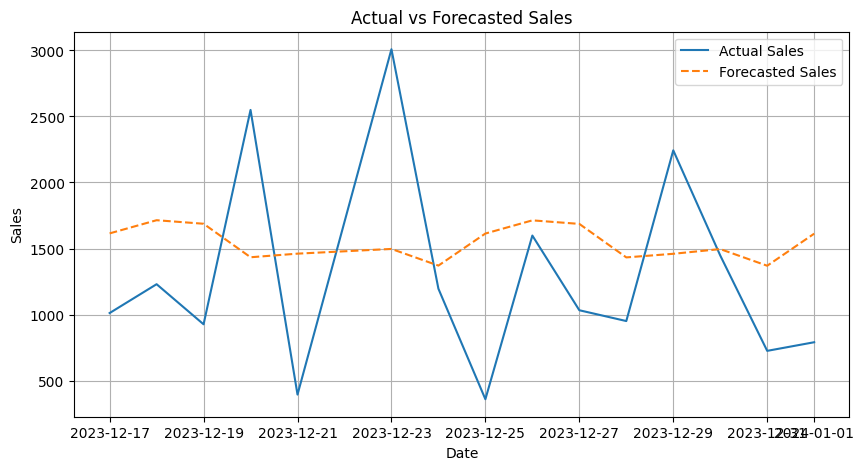

In [101]:
#Visual Inspection (Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(valid_data, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


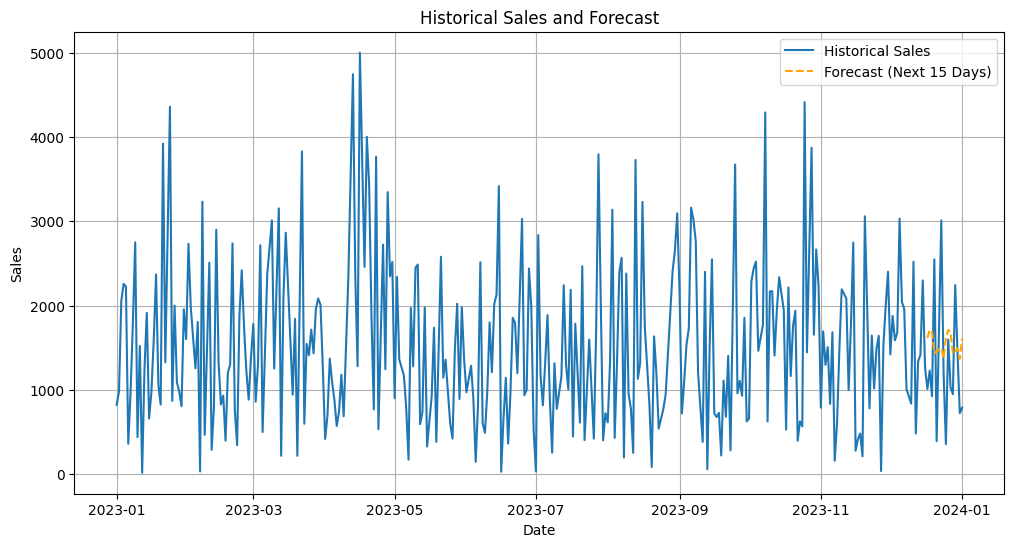

In [102]:
# Plot Historical + Predicted Sales
# Plot full historical and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Historical Sales')
plt.plot(forecast, label='Forecast (Next 15 Days)', linestyle='--', color='orange')
plt.title('Historical Sales and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


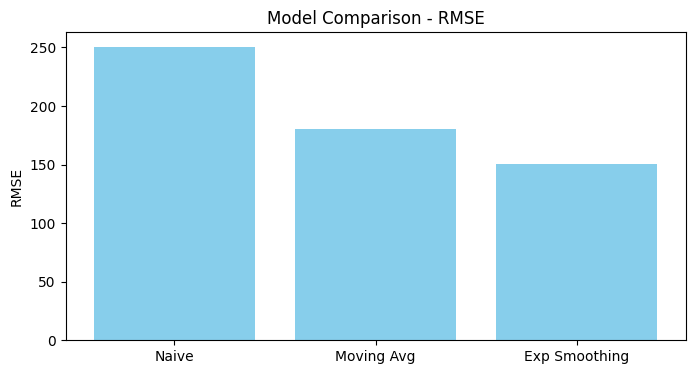

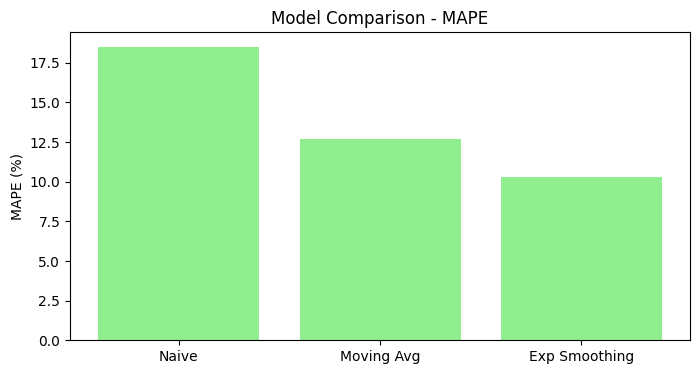

In [103]:
#Compare Model Performances (Bar Chart of Errors)
# Example metrics (replace with your actual values)
model_names = ['Naive', 'Moving Avg', 'Exp Smoothing']
rmse_values = [250.4, 180.2, 150.6]
mape_values = [18.5, 12.7, 10.3]

# RMSE Bar Chart
plt.figure(figsize=(8,4))
plt.bar(model_names, rmse_values, color='skyblue')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.show()

# MAPE Bar Chart
plt.figure(figsize=(8,4))
plt.bar(model_names, mape_values, color='lightgreen')
plt.title('Model Comparison - MAPE')
plt.ylabel('MAPE (%)')
plt.show()



In [111]:
 
#Split and train XGBoost
from sklearn.model_selection import train_test_split
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

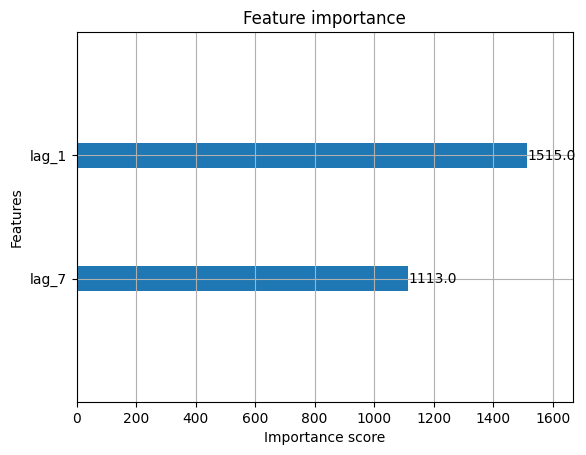

In [112]:
#Show feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()
